## Whit this note can do? 
- collecting figures that can be used for the manuscirpt. 

In [22]:
#Pkg.add("Pkg"); import Pkg; 
ENV["LD_LIBRARY_PATH"] = ""
using Pkg
using Distributed
using DelimitedFiles
using Distances
using StatsBase  # StatsBase.mode
using CSV
using Profile    
using Random
using Statistics
using LinearAlgebra
using KernelDensity
using Printf
using Measures
using LaTeXStrings;
using Plots
using DataFrames
using StatsPlots
rng = Random.MersenneTwister(1234);
# If I get any message related to library, try the following command.
#filter!(lib -> occursin("glib", lib), dllist())

In [23]:
const pxl2pt = 0.75;
α_gen_dbl = 83 * 0.5
α_gen_sgl = 83
α_lbl_dbl = 55.4 * 0.5
α_lbl_sgl = 55.4;
my_margin = 5mm;

In [24]:
include("../src/analysis.jl");
include("../src/basic_MPL.jl");
include("../src/my_HIV_data_cleanign.jl")
include("../src/basic_analysis.jl");
include("../src/basic.jl");
include("../src/figure.jl");
Alpha_set_temp = ["-","A","C","D","E","F","G","H","I","K","L","M","N","P","Q","R","S","T","V","W","Y", "*"];
Alpha_Dic_temp = Dict( "-"=>1,"A"=>2,"C"=>3,"D"=>4,"E"=>5,
	"F"=>6,"G"=>7,"H"=>8,"I"=>9,"K"=>10,"L"=>11,
	"M"=>12,"N"=>13,"P"=>14,"Q"=>15,"R"=>16,"S"=>17,"T"=>18,"V"=>19,"W"=>20, "Y"=>21, "*"=>22);
NUC = ["-", "A", "C", "G", "T"];
q = length(NUC);
AA_set = ["-", "A", "C", "D", "E", "F", "G", "H", "I", "K", "L", "M", "N", "P", "Q", "R", "S", "T", "V", "W", "Y", "*"];
AA2NUM = Dict(AA_set[i] => i for i in 1:length(AA_set));
q_AA = length(AA_set);

In [25]:
fname_key_human_and_RMs = ["703010848", "RM6163", "RM6167", "RM6700", "RM6713", "RM6714", "RM6720"];
n_RMs_max = length(fname_key_human_and_RMs)
n_len_H_RMs = length(fname_key_human_and_RMs);

csv_raw_CH848 = DataFrame(CSV.File("../out/703010848-3-poly_sorted_with_mutant.csv"));
csv_raw_RMs_merged = DataFrame(CSV.File("../out/RMs-merged-3-poly_sorted_with_mutant_CH848.csv"));

seq_raw = readdlm("../data/mpl/703010848-3-poly-seq2state.dat");
time_temp = copy(seq_raw[:,1])
time_unique = Int.(sort(unique(time_temp)));

## Making Trajecotry plots 

In [7]:
L_fig_tot = 1_200
(plot_traject, time_unique, x1_DH270, x1_DH272, x1_DH475, x1_autologous, x1_glycan) = get_trajectory_plot_CH848_with_glycan(
    csv_raw_CH848, L_fig_tot);
(plot_selection_vs_time, time_DH270, time_DH272, time_DH475, time_autologous, time_glycans, 
selection_DH270, selection_DH272, selection_DH475, selection_autologous, selection_glycans, 
mutation_name_DH270, mutation_name_DH272, mutation_name_DH475, mutation_name_strain_specific, mutation_name_glycan) = get_selection_vs_time_plot_CH848_with_glycan(csv_raw_CH848, L_fig_tot);
(plot_violin_plot, s_res_DH270, s_res_DH272, s_res_DH475, s_res_spcfc, s_res_glycan) = get_violin_plot_CH848_with_glycan(csv_raw_CH848, L_fig_tot);


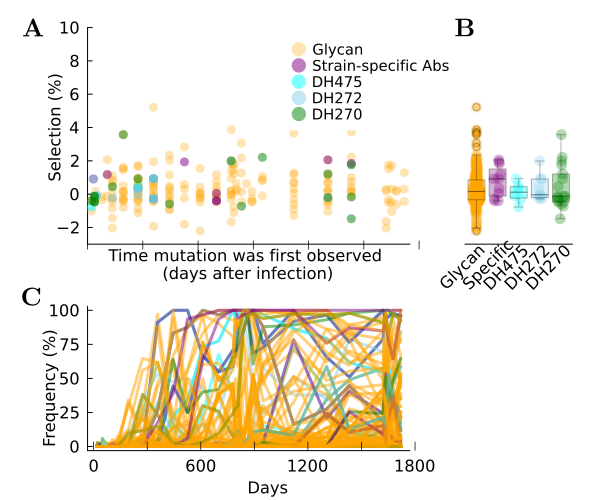

In [8]:
l = @layout [
    a{0.75w, 0.6h} b{0.25w, 0.6h}
    c{0.75w, 0.4h} _]
Plots.plot(plot_selection_vs_time, plot_violin_plot, 
            plot_traject, layout=l, size=(L_fig_tot*0.5,500))
#Plots.savefig("../fig/trajecory_selection_CH848.pdf")

In [9]:
flat_x1_DH270 = [item for sublist in x1_DH270 for item in sublist]
flat_time_DH270 = [item for sublist in x1_DH270 for item in time_unique]
flat_id_DH270 = [@sprintf("DH270.%d", n) for n in 1:size(x1_DH270,1) for i in time_unique]
#
flat_x1_DH272 = [item for sublist in x1_DH272 for item in sublist]
flat_time_DH272 = [item for sublist in x1_DH272 for item in time_unique]
flat_id_DH272 = [@sprintf("DH272.%d", n) for n in 1:size(x1_DH272,1) for i in time_unique]
#
flat_x1_DH475 = [item for sublist in x1_DH475 for item in sublist]
flat_time_DH475 = [item for sublist in x1_DH475 for item in time_unique]
flat_id_DH475 = [@sprintf("DH475.%d", n) for n in 1:size(x1_DH475,1) for i in time_unique]
#
flat_x1_autologous = [item for sublist in x1_autologous for item in sublist]
flat_time_autologous = [item for sublist in x1_autologous for item in time_unique];
flat_id_autologous = [@sprintf("autologous.%d", n) for n in 1:size(x1_autologous,1) for i in time_unique];
#
flat_x1_glycan = [item for sublist in x1_glycan for item in sublist]
flat_time_glycan = [item for sublist in x1_glycan for item in time_unique];
flat_id_glycan = [@sprintf("glycan.%d", n) for n in 1:size(x1_glycan,1) for i in time_unique];

In [32]:
# -------- Export the data for Fig3A, the selection vs time plot -------#
df = DataFrame( 
    id=[flat_id_DH270; flat_id_DH272; flat_id_DH475; flat_id_autologous; flat_id_glycan], 
    time=[flat_time_DH270; flat_time_DH272; flat_time_DH475; flat_time_autologous; flat_time_glycan], 
    frequency=[flat_x1_DH270; flat_x1_DH272; flat_x1_DH475; flat_x1_autologous; flat_x1_glycan], 
);
CSV.write("../out/for_figures/figS4C_trajectory.csv", df); 

In [10]:
df = DataFrame(
    category=[repeat(["DH270"], length(time_DH270)); repeat(["DH272"], length(time_DH272));
     repeat(["DH475"], length(time_DH475)); repeat(["autologous"], length(time_autologous)); repeat(["glycan"], length(time_glycans))], 
    mutation=[mutation_name_DH270; mutation_name_DH272; mutation_name_DH475; mutation_name_strain_specific; mutation_name_glycan],
    time=[time_DH270; time_DH272; time_DH475; time_autologous; time_glycans], 
    selection=[selection_DH270; selection_DH272; selection_DH475; selection_autologous; selection_glycans] )
#CSV.write("../out/for_figures/figS4A_selection_vs_time.csv", df); 

Row,category,mutation,time,selection
,String,String7?,Int64,Float64
1,DH270,N230D,194,0.0357337
2,DH270,D743G,949,0.0221246
3,DH270,D325N,780,0.0199054
4,DH270,N300Y,1432,0.0175999
5,DH270,S334N,1305,0.0121203
6,DH270,T612S,274,0.00920948
7,DH270,R835G,135,0.00441949
8,DH270,N332-,38,-0.00126323
9,DH270,N332-,38,-0.00126323


In [11]:
idx_glycan = df[:, 1] .== "glycan"; 
idx_in_460_to_466 = Bool.([x ∈ 460:466 for x in extract_integer.(df.mutation)]);

count(idx_glycan .* idx_in_460_to_466)

13

## Selection, detected time, frequency trajectory for reduced data. 

In [12]:
L_fig_tot = 1200
(plot_trajectory, time_unique, x1_set_for_figures_nef, x1_set_for_figures_env, x1_set_for_figures_else) = get_trajectory_plot_CH848_reduced(csv_raw_CH848, L_fig_tot) 

(plot_s_vs_t, time_nef_figure, time_env_figure, time_els_figure, 
        selection_nef_figure, selection_env_figure, selection_els_figure) = get_selection_vs_time_plot_CH848_reduced(csv_raw_CH848, L_fig_tot)
(plot_s_violin, s_res_nef, s_res_env, s_res_els) = get_violin_plot_CH848_reduced(csv_raw_CH848, L_fig_tot);

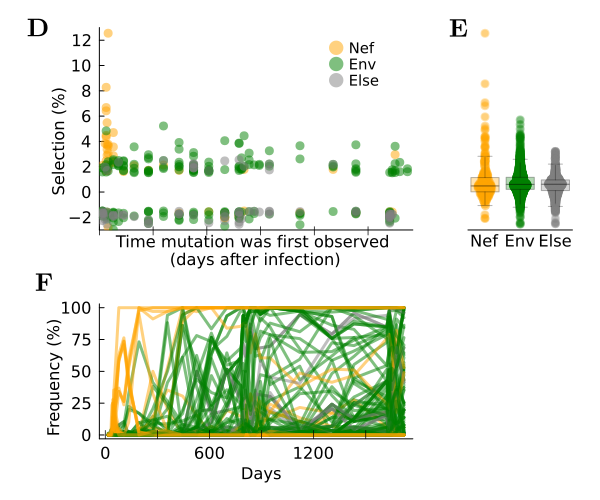

In [13]:
l = @layout [
    plot_s_vs_t{0.75w, 0.6h} plot_s_violin{0.25w, 0.6h}
    plot_trajectory{0.75w, 0.4h} _ ]
Plots.plot(plot_s_vs_t, plot_s_violin, plot_trajectory, layout=l, size=(L_fig_tot*0.5,500))
#Plots.savefig("../fig/CH848/trajecory_sselection_CH848.pdf")

In [14]:
flat_x1_nef = [item for sublist in x1_set_for_figures_nef for item in sublist]
flat_time_nef = [item for sublist in x1_set_for_figures_nef for item in time_unique]
flat_id_nef = [@sprintf("nef.%d", n) for n in 1:size(x1_set_for_figures_nef,1) for i in time_unique]
#
flat_x1_env = [item for sublist in x1_set_for_figures_env for item in sublist]
flat_time_env = [item for sublist in x1_set_for_figures_env for item in time_unique]
flat_id_env = [@sprintf("env.%d", n) for n in 1:size(x1_set_for_figures_env,1) for i in time_unique]
#
flat_x1_els = [item for sublist in x1_set_for_figures_else for item in sublist]
flat_time_els = [item for sublist in x1_set_for_figures_else for item in time_unique]
flat_id_els = [@sprintf("els.%d", n) for n in 1:size(x1_set_for_figures_else,1) for i in time_unique];


In [139]:
# -------- Export the data for Fig3A, the selection vs time plot -------#
df = DataFrame( 
    id=[flat_id_nef; flat_id_env; flat_id_els], 
    time=[flat_time_nef; flat_time_env; flat_time_els], 
    frequency=[flat_x1_nef; flat_x1_env; flat_x1_els], 
)
CSV.write("../out/for_figures/fig3F_trajectory.csv", df); 

In [140]:
df = DataFrame(
    category=[repeat(["nef"], length(time_nef_figure)); repeat(["env"], length(time_env_figure));
        repeat(["else"], length(time_els_figure))], 
    time=[time_nef_figure; time_env_figure; time_els_figure], 
   selection=[selection_nef_figure; selection_env_figure; selection_els_figure] 
)
CSV.write("../out/for_figures/fig3D_selection_vs_time.csv", df); 

## Compare Fitness landscape of RMs and CH848

In [26]:
csv_raw_CH848 = DataFrame(CSV.File("../data/mpl/SHIV.CH848_AA/703010848-poly.csv"));
poly_idx_CH848 =  DataFrame(CSV.File("../data/mpl/SHIV.CH848_AA/index-703010848.csv"));
poly_idx_RMs = DataFrame(CSV.File("../data/mpl/SHIV.CH848_AA/index-RMs-poly.csv"));
csv_raw_RMs_merged = DataFrame(CSV.File("../data/mpl/SHIV.CH848_AA/RMs-poly.csv"));
n_H_RMs = length(fname_key_human_and_RMs);
fname_dev = ["RM6163", "RM6167"]
marker_set_with_human = ["circle", "circle", "circle", "utriangle", "utriangle", "utriangle", "utriangle"];


## Compare fitness landscapes of CH848 and jointed SHIV.CH848

In [16]:
dir_name = "../data/mpl/SHIV.CH848_AA/"
(fitness_ind_tot_CH848_random_set, fitness_ind_tot_RMs_random_set, 
 mean_fitness_ind_tot_CH848_random_set, mean_fitness_ind_tot_RMs_random_set,     
 errorbar_tot_CH848_set, errorbar_tot_RMs_set, 
    date_unique_set, bool_BNB_nonBNB) = get_compare_fitness(fname_key_human_and_RMs, fname_dev, dir_name, 
                        csv_raw_CH848, csv_raw_RMs_merged; flag_include_HIV = false, flag_shuffle = false);

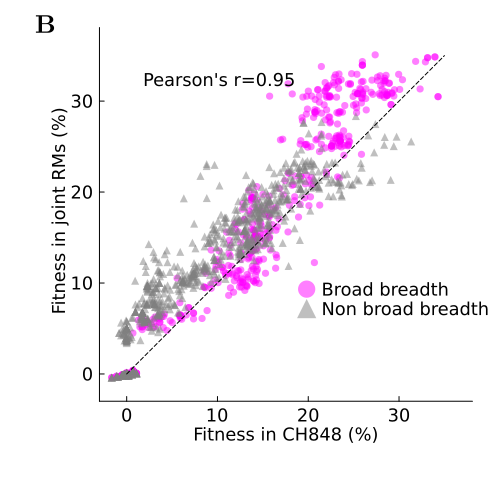

In [17]:
L_fig = 500
fontsize_reg = Int(ceil((2*L_fig)/α_gen_sgl * pxl2pt * (1.0/0.8))) # because we rescale these figures
fontsize_label_reg = Int(ceil((2*L_fig)/α_lbl_sgl * pxl2pt* (1.0/0.8)))
my_alpha = 0.5

fitness_ind_tot_CH848_random_set_vec = copy(reduce(vcat, fitness_ind_tot_CH848_random_set))
fitness_ind_tot_RMs_random_set_vec = copy(reduce(vcat, fitness_ind_tot_RMs_random_set))

max_x = maximum([maximum(fitness_ind_tot_CH848_random_set_vec), maximum(fitness_ind_tot_RMs_random_set_vec)]) + 3
p1tot = scatter(fitness_ind_tot_CH848_random_set_vec[Bool.(bool_BNB_nonBNB)], 
            fitness_ind_tot_RMs_random_set_vec[Bool.(bool_BNB_nonBNB)],
            label="Broad breadth", 
            c=:magenta, 
            alpha=my_alpha,
            foreground_color_legend = nothing,
            labelfontsize=fontsize_reg,
            xlim=(-3, max_x), 
            ylim=(-3, max_x), 
            markerstrokewidth=0,
            grid=:false,
            m = :circle,
            margin=my_margin, 
            xlabel="Fitness in CH848 (%)\n ", 
            ylabel=" \n Fitness in joint RMs (%)",
            legend=(0.6, 0.3),
            legendfontsize=fontsize_reg, 
            tickfontsize=fontsize_reg,
)
scatter!(fitness_ind_tot_CH848_random_set_vec[.!Bool.(bool_BNB_nonBNB)], 
            fitness_ind_tot_RMs_random_set_vec[.!Bool.(bool_BNB_nonBNB)],
            label="Non broad breadth", 
            c=:gray, 
            alpha=my_alpha,
            foreground_color_legend = nothing,
            labelfontsize=fontsize_reg,
            xlim=(-3, max_x), 
            ylim=(-3, max_x), 
            markerstrokewidth=0,
            legend=(0.6, 0.3),
            m =:utriangle,
)
pearson_cor = cor(fitness_ind_tot_CH848_random_set_vec, fitness_ind_tot_RMs_random_set_vec);
annotate!(2, max_x*0.85, text(@sprintf("Pearson's r=%.2f", pearson_cor), 
        fontsize_reg, :left, rotation=0, color=:black))
Plots.plot!(p1tot[1], collect(0:35), collect(0:35), sybplot=1, c="black", linestyle=:dash, label=:false)
annotate!(-10, max_x*1.01, text(L"\textbf{B}", :left, fontsize_label_reg))

Plots.plot(p1tot, size=(L_fig, L_fig))


In [144]:
# -------- Export the data for Fig4A, comparison of CH848 and jointed RMs fitness landscapes  -------#
df = DataFrame( F_CH848 = fitness_ind_tot_CH848_random_set_vec,
                F_jointedRMs = fitness_ind_tot_RMs_random_set_vec,
                breadth = bool_BNB_nonBNB )
CSV.write("../out/for_figures/fig4B_fitness_comparison.csv", df); 

### Shuffled sequences 

In [18]:
dir_name = "../data/mpl/SHIV.CH848_AA/"
(fitness_ind_tot_CH848_shuffle_set, fitness_ind_tot_RMs_shuffle_set, 
 mean_fitness_ind_tot_CH848_shuffle_set, mean_fitness_ind_tot_RMs_shuffle_set,     
 errorbar_tot_CH848_shuffle_set, errorbar_tot_RMs_shuffle_set, 
    date_unique_set_shuffle, bool_BNB_nonBNB_shuffle) = get_compare_fitness(fname_key_human_and_RMs, fname_dev, dir_name, 
                        csv_raw_CH848, csv_raw_RMs_merged; flag_include_HIV = false, flag_shuffle = true);

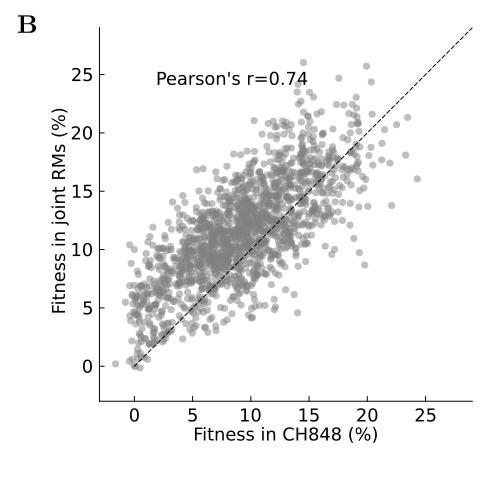

In [19]:
L_fig = 500
fontsize_reg = Int(ceil((2*L_fig)/α_gen_sgl * pxl2pt * (1.0/0.8))) # because we rescale these figures
fontsize_label_reg = Int(ceil((2*L_fig)/α_lbl_sgl * pxl2pt* (1.0/0.8)))
my_alpha = 0.5

fitness_ind_tot_CH848_shuffle_set_vec = copy(reduce(vcat, fitness_ind_tot_CH848_shuffle_set))
fitness_ind_tot_RMs_shuffle_set_vec = copy(reduce(vcat, fitness_ind_tot_RMs_shuffle_set))

max_x = maximum([maximum(fitness_ind_tot_CH848_shuffle_set_vec), maximum(fitness_ind_tot_RMs_shuffle_set_vec)]) + 3
p1tot = scatter(fitness_ind_tot_CH848_shuffle_set_vec[Bool.(bool_BNB_nonBNB_shuffle)], 
            fitness_ind_tot_RMs_shuffle_set_vec[Bool.(bool_BNB_nonBNB_shuffle)],
            legend=:false,
            c=:gray, 
            alpha=my_alpha,
            foreground_color_legend = nothing,
            labelfontsize=fontsize_reg,
            xlim=(-3, max_x), 
            ylim=(-3, max_x), 
            markerstrokewidth=0,
            grid=:false,
            m = :circle,
            margin=my_margin, 
            xlabel="Fitness in CH848 (%)\n ", 
            ylabel=" \n Fitness in joint RMs (%)",
            legendfontsize=fontsize_reg, 
            tickfontsize=fontsize_reg,
)
scatter!(fitness_ind_tot_CH848_shuffle_set_vec[.!Bool.(bool_BNB_nonBNB_shuffle)], 
            fitness_ind_tot_RMs_shuffle_set_vec[.!Bool.(bool_BNB_nonBNB_shuffle)],
            legend=:false,
            c=:gray, 
            alpha=my_alpha,
            foreground_color_legend = nothing,
            labelfontsize=fontsize_reg,
            xlim=(-3, max_x), 
            ylim=(-3, max_x), 
            markerstrokewidth=0,
            m =:circle,
)
pearson_cor = cor(fitness_ind_tot_CH848_shuffle_set_vec, fitness_ind_tot_RMs_shuffle_set_vec);
annotate!(2, max_x*0.85, text(@sprintf("Pearson's r=%.2f", pearson_cor), 
        fontsize_reg, :left, rotation=0, color=:black))
Plots.plot!(p1tot[1], collect(0:35), collect(0:35), sybplot=1, c="black", linestyle=:dash, label=:false)
annotate!(-10, max_x*1.01, text(L"\textbf{B}", :left, fontsize_label_reg))

Plots.plot(p1tot, size=(L_fig, L_fig))


In [147]:
# -------- Export the data for Fig4A, comparison of CH848 and jointed RMs fitness landscapes  -------#
df = DataFrame( F_CH848 = fitness_ind_tot_CH848_shuffle_set_vec,
                F_jointedRMs = fitness_ind_tot_RMs_shuffle_set_vec,
                breadth = bool_BNB_nonBNB_shuffle )
CSV.write("../out/for_figures/figS3B_fitness_comparison_using_shuffled_seq.csv", df); 

## Fitness change Plots 

α_dev=0.062 α_undev=0.062 


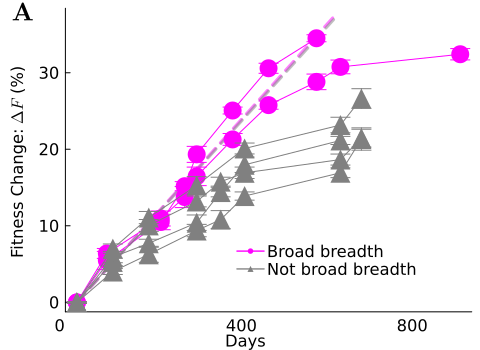

In [148]:
# This figure would be double column
n_H_RMs = length(fname_key_human_and_RMs)
k = 1
L_fig_tot = 1200
L_fig = Int(0.4*L_fig_tot)
fontsize_reg = Int(ceil(L_fig_tot/α_gen_sgl * pxl2pt))
fontsize_label_reg = Int(ceil(L_fig_tot/α_lbl_sgl * pxl2pt))

my_ms = 10
α_lin_dev = linreg(date_unique_set[k][1:7], mean_fitness_ind_tot_RMs_random_set[k][1:7])
α_lin_dev += linreg(date_unique_set[k+1][1:7], mean_fitness_ind_tot_RMs_random_set[k+1][1:7])
α_lin_undev = linreg(date_unique_set[3][1:4], mean_fitness_ind_tot_RMs_random_set[3][1:4])
for k_temp in 3:6 α_lin_undev += linreg(date_unique_set[k_temp][1:4], mean_fitness_ind_tot_RMs_random_set[k_temp][1:4]) end
α_lin_dev /= 2; α_lin_undev /= 4
@printf("α_dev=%.3f α_undev=%.3f \n", α_lin_dev, α_lin_undev)

p = Plots.plot(collect(0:100:600), α_lin_dev*collect(0:100:600), linestyle=:dash, c=:magenta, label=:false, lw=3, alpha=0.5)
Plots.plot!(collect(0:100:600), α_lin_undev*collect(0:100:600), linestyle=:dash, c=:gray, label=:false, lw=3, alpha=0.5)


plot!(date_unique_set[k], mean_fitness_ind_tot_RMs_random_set[k], 
#    m=Symbol(marker_set_with_human[k]), label=fname_key_human_and_RMs[k],     
    m=Symbol(marker_set_with_human[k+1]), label="Broad breadth",
    yerror=errorbar_tot_RMs_set[k],
    markerstrokecolor="magenta",
    c="magenta",
    size=(L_fig,Int(350)),
    foreground_color_legend = nothing,
    labelfontsize=fontsize_reg,
    grid=:false,
    margin=0.1mm, 
    ms=my_ms,
    xlabel=" \n ", 
    ylabel=" \n ", 
    xticks=:false,
#    xlim=(-10, 900),
    legend=(0.5, 0.2),
#    legend=:false,
    legendfontsize=fontsize_reg, 
    tickfontsize=fontsize_reg,
)
annotate!(-140, 6, text(L"Fitness Change: $ΔF$ (%)", fontsize_reg, :left, rotation=90))
annotate!(350, -5, text("Days", fontsize_reg, :left))
[annotate!(i-50, -3, text(string(i), fontsize_reg, :left)) for i in [0, 400, 800]]

for k in 2:(n_H_RMs-1)
    key_RM = fname_key_human_and_RMs[k+1]
    this_c = "gray"
    if(key_RM ∈ fname_dev) this_c = "magenta" end
#    if(key_RM == "RM6072") this_c = "pink" end
    if(k==4)
        plot!(p[1], date_unique_set[k], mean_fitness_ind_tot_RMs_random_set[k], ms=my_ms,
            yerror=errorbar_tot_RMs_set[k], markerstrokecolor=this_c,
            sbuplot=1, m=Symbol(marker_set_with_human[k+1]), label="Not broad breadth", c=this_c)
    end
    if(k!=4)
        plot!(p[1], date_unique_set[k], mean_fitness_ind_tot_RMs_random_set[k], ms=my_ms,
            yerror=errorbar_tot_RMs_set[k], markerstrokecolor=this_c,
            sbuplot=1, m=Symbol(marker_set_with_human[k+1]), label=:false, c=this_c)
    end
end
#display(p);
annotate!(-150, 38, text(L"\textbf{A}", :left, fontsize_label_reg))
#Plots.savefig("../fig/CH848/fitness_change_mutations_left_fig.pdf")

α_dev=0.062 α_undev=0.062 


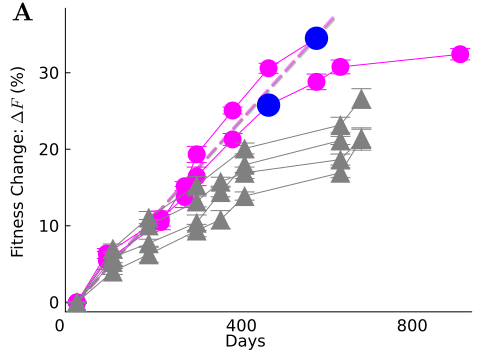

In [149]:
# This figure would be double column
n_H_RMs = length(fname_key_human_and_RMs)
k = 1
L_fig_tot = 1200
L_fig = Int(0.4*L_fig_tot)
fontsize_reg = Int(ceil(L_fig_tot/α_gen_sgl * pxl2pt))
fontsize_label_reg = Int(ceil(L_fig_tot/α_lbl_sgl * pxl2pt))

my_ms = 10
α_lin_dev = linreg(date_unique_set[k][1:7], mean_fitness_ind_tot_RMs_random_set[k][1:7])
α_lin_dev += linreg(date_unique_set[k+1][1:7], mean_fitness_ind_tot_RMs_random_set[k+1][1:7])
α_lin_undev = linreg(date_unique_set[3][1:4], mean_fitness_ind_tot_RMs_random_set[3][1:4])
for k_temp in 3:6 α_lin_undev += linreg(date_unique_set[k_temp][1:4], mean_fitness_ind_tot_RMs_random_set[k_temp][1:4]) end
α_lin_dev /= 2; α_lin_undev /= 4
@printf("α_dev=%.3f α_undev=%.3f \n", α_lin_dev, α_lin_undev)

p = Plots.plot(collect(0:100:600), α_lin_dev*collect(0:100:600), linestyle=:dash, c=:magenta, label=:false, lw=3, alpha=0.5)
Plots.plot!(collect(0:100:600), α_lin_undev*collect(0:100:600), linestyle=:dash, c=:gray, label=:false, lw=3, alpha=0.5)


plot!(date_unique_set[k], mean_fitness_ind_tot_RMs_random_set[k], 
#    m=Symbol(marker_set_with_human[k]), label=fname_key_human_and_RMs[k],     
    m=Symbol(marker_set_with_human[k+1]), label="Broad breadth",
    yerror=errorbar_tot_RMs_set[k],
    markerstrokecolor="magenta",
    c="magenta",
    size=(L_fig,Int(350)),
    foreground_color_legend = nothing,
    labelfontsize=fontsize_reg,
    grid=:false,
    margin=0.1mm, 
    ms=my_ms,
    xlabel=" \n ", 
    ylabel=" \n ", 
    xticks=:false,
#    xlim=(-10, 900),
    legend=(0.5, 0.2),
#    legend=:false,
    legendfontsize=fontsize_reg, 
    tickfontsize=fontsize_reg,
)
annotate!(-140, 6, text(L"Fitness Change: $ΔF$ (%)", fontsize_reg, :left, rotation=90))
annotate!(350, -5, text("Days", fontsize_reg, :left))
[annotate!(i-50, -3, text(string(i), fontsize_reg, :left)) for i in [0, 400, 800]]

for k in 2:(n_H_RMs-1)
    key_RM = fname_key_human_and_RMs[k+1]
    this_c = "gray"
    if(key_RM ∈ fname_dev) this_c = "magenta" end
#    if(key_RM == "RM6072") this_c = "pink" end
    if(k==4)
        plot!(p[1], date_unique_set[k], mean_fitness_ind_tot_RMs_random_set[k], ms=my_ms,
            yerror=errorbar_tot_RMs_set[k], markerstrokecolor=this_c,
            sbuplot=1, m=Symbol(marker_set_with_human[k+1]), label="Not broad breadth", c=this_c)
    end
    if(k!=4)
        plot!(p[1], date_unique_set[k], mean_fitness_ind_tot_RMs_random_set[k], ms=my_ms,
            yerror=errorbar_tot_RMs_set[k], markerstrokecolor=this_c,
            sbuplot=1, m=Symbol(marker_set_with_human[k+1]), label=:false, c=this_c)
    end
end
#display(p);
annotate!(-150, 38, text(L"\textbf{A}", :left, fontsize_label_reg))
#Plots.savefig("../fig/CH848/fitness_change_mutations_left_fig.pdf")

Plots.scatter!([date_unique_set[1][8]], [mean_fitness_ind_tot_RMs_random_set[1][8]], ms=my_ms+3, c=:blue, legend=false, markerstrokewidth=0)
Plots.scatter!([date_unique_set[2][7]], [mean_fitness_ind_tot_RMs_random_set[2][7]], ms=my_ms+3, c=:blue, legend=false, markerstrokewidth=0)
#Plots.savefig("../fig/fitness_change_mutations_CH848_temp.pdf")

In [27]:
fname_key_human_and_RMs

7-element Vector{String}:
 "703010848"
 "RM6163"
 "RM6167"
 "RM6700"
 "RM6713"
 "RM6714"
 "RM6720"

In [41]:
dir_name = "../data/mpl/SHIV.CH848_AA/"

##Note this function exclude HIV because the flag_include_HIV is off.
(fitness_ind_tot_CH848_random_set, fitness_ind_tot_RMs_random_set, 
 mean_fitness_ind_tot_CH848_random_set, mean_fitness_ind_tot_RMs_random_set,     
 errorbar_tot_CH848_set, errorbar_tot_RMs_set, 
    date_unique_set, bool_BNB_nonBNB) = get_compare_fitness(fname_key_human_and_RMs, fname_dev, dir_name, 
                        csv_raw_CH848, csv_raw_RMs_merged; flag_include_HIV = false, flag_shuffle = false);

#RM_id = [@sprintf("RM%d", k) for k in 1:size(date_unique_set,1) for _ in date_unique_set[k]]
RM_id = [fname_key_human_and_RMs[k+1] for k in 1:size(date_unique_set,1) for _ in date_unique_set[k]]
# Suppose RMs 1-3 have broad breadth 
breadth = [x ∈ fname_key_human_and_RMs[1:3]  for x in RM_id ]
date = [item for sublist in date_unique_set for item in sublist]
mean_F = [item for sublist in mean_fitness_ind_tot_RMs_random_set for item in sublist]
std_F = [item for sublist in errorbar_tot_RMs_set for item in sublist];
#CSV.write("../out/for_figures/figS6A_fitness_change.csv", df);
#"""
dir_name = "../data/mpl/SHIV.CH848_AA/"
(fitness_ind_tot_CH848_random_set, fitness_ind_tot_RMs_random_set, 
 mean_fitness_ind_tot_CH848_random_set, mean_fitness_ind_tot_RMs_random_set,     
 errorbar_tot_CH848_set, errorbar_tot_RMs_set, 
    date_unique_set, bool_BNB_nonBNB) = get_compare_fitness(fname_key_human_and_RMs, fname_dev, dir_name, 
                        csv_raw_CH848, csv_raw_RMs_merged; flag_include_HIV = true, flag_shuffle = false);

RM_id = [copy(RM_id); ["CH848" for _ in date_unique_set[1]]]    
breadth = [copy(breadth); [true for _ in date_unique_set[1]]]
date = [copy(date); date_unique_set[1]]
mean_F = [copy(mean_F); mean_fitness_ind_tot_CH848_random_set[1]]
std_F = [copy(std_F); errorbar_tot_CH848_set[1]];
#"""


df = DataFrame(
    RM_id = RM_id,
    breadth = breadth,
    date = date,
    mean_F = mean_F,
    std_F = std_F
)   ;


In [42]:
CSV.write("../out/for_figures/figS6A_fitness_change.csv", df);

In [45]:
"""
csv_in = DataFrame(CSV.File("../out/for_figures/figS6A_fitness_change.csv"));
p = Plots.plot()
for k in 1:(length(fname_key_human_and_RMs)-1)
    id_look = csv_in.RM_id .== fname_key_human_and_RMs[k+1]
    Plots.plot!(csv_in.date[id_look], csv_in.mean_F[id_look], m=:o, label=fname_key_human_and_RMs[k+1])
end
id_look = csv_in.RM_id .== "CH848"
Plots.plot!(csv_in.date[id_look], csv_in.mean_F[id_look], m=:o, label="CH848")
display(p)
""";

### Including HIV sequences for projection onto the jont RMs fitness landscape.

In [152]:
"""
dir_name = "../data/mpl/SHIV.CH848_AA/"
(fitness_ind_tot_CH848_random_set, fitness_ind_tot_RMs_random_set, 
 mean_fitness_ind_tot_CH848_random_set, mean_fitness_ind_tot_RMs_random_set,     
 errorbar_tot_CH848_set, errorbar_tot_RMs_set, 
    date_unique_set, bool_BNB_nonBNB) = get_compare_fitness(fname_key_human_and_RMs, fname_dev, dir_name, 
                        csv_raw_CH848, csv_raw_RMs_merged; flag_include_HIV = true, flag_shuffle = false);
""";

In [153]:
"""
# This figure would be double column
n_H_RMs = length(fname_key_human_and_RMs)
L_fig_tot = 1200
L_fig = Int(0.4*L_fig_tot)
fontsize_reg = Int(ceil(L_fig_tot/α_gen_sgl * pxl2pt))
fontsize_label_reg = Int(ceil(L_fig_tot/α_lbl_sgl * pxl2pt))

my_ms = 10
k = 2
α_lin_dev = linreg(date_unique_set[k][1:7], mean_fitness_ind_tot_RMs_random_set[k][1:7])
α_lin_dev += linreg(date_unique_set[k+1][1:7], mean_fitness_ind_tot_RMs_random_set[k+1][1:7])
α_lin_undev = linreg(date_unique_set[k+2][1:4], mean_fitness_ind_tot_RMs_random_set[k+2][1:4])
for k_temp in 4:7 α_lin_undev += linreg(date_unique_set[k_temp][1:4], mean_fitness_ind_tot_RMs_random_set[k_temp][1:4]) end
α_lin_dev /= 2; α_lin_undev /= 4
@printf("α_dev=%.3f α_undev=%.3f \n", α_lin_dev, α_lin_undev)

p = Plots.plot(collect(0:100:600), α_lin_dev*collect(0:100:600), linestyle=:dash, c=:magenta, label=:false, lw=3, alpha=0.5)
Plots.plot!(collect(0:100:600), α_lin_undev*collect(0:100:600), linestyle=:dash, c=:gray, label=:false, lw=3, alpha=0.5)

k = 1
#plot!(date_unique_set[k], mean_fitness_ind_tot_RMs_random_set[k], 
plot!(date_unique_set[k], mean_fitness_ind_tot_CH848_random_set[k], 
#    m=Symbol(marker_set_with_human[k]), label=fname_key_human_and_RMs[k],     
    m=Symbol(marker_set_with_human[k]), label="CH848",
    yerror=errorbar_tot_RMs_set[k],
    markerstrokecolor="red",
    c="red",
    size=(L_fig,Int(350)),
    foreground_color_legend = nothing,
    labelfontsize=fontsize_reg,
    grid=:false,
    margin=0.1mm, 
    ms=my_ms,
    xlabel=" \n ", 
    ylabel=" \n ", 
    xticks=:false,
#    xlim=(-10, 900),
    legend=(0.5, 0.2),
#    legend=:false,
    legendfontsize=fontsize_reg, 
    tickfontsize=fontsize_reg,
)
annotate!(-250, 6, text(L"Fitness Change: $ΔF$ (%)", fontsize_reg, :left, rotation=90))
annotate!(350, -5, text("Days", fontsize_reg, :left))
[annotate!(i-50, -3, text(string(i), fontsize_reg, :left)) for i in [0, 400, 800]]

for k in 2:n_H_RMs
    key_RM = fname_key_human_and_RMs[k]
    this_c = "gray"
    if(key_RM ∈ fname_dev) this_c = "magenta" end
    if(key_RM == "RM6163")
        plot!(p[1], date_unique_set[k], mean_fitness_ind_tot_RMs_random_set[k], ms=my_ms,
            yerror=errorbar_tot_RMs_set[k], markerstrokecolor=this_c,
            sbuplot=1, m=Symbol(marker_set_with_human[k]), label="Broad breadth", c=this_c)
    end
    if(key_RM == "RM6700")
        plot!(p[1], date_unique_set[k], mean_fitness_ind_tot_RMs_random_set[k], ms=my_ms,
            yerror=errorbar_tot_RMs_set[k], markerstrokecolor=this_c,
            sbuplot=1, m=Symbol(marker_set_with_human[k]), label="Not broad breadth", c=this_c)
    end
    if(k ∉ ["RM6163", "RM6700" ])
        plot!(p[1], date_unique_set[k], mean_fitness_ind_tot_RMs_random_set[k], ms=my_ms,
            yerror=errorbar_tot_RMs_set[k], markerstrokecolor=this_c,
            sbuplot=1, m=Symbol(marker_set_with_human[k]), label=:false, c=this_c)
    end
end
#annotate!(-150, 38, text(L"\textbf{A}", :left, fontsize_label_reg))
display(p);
Plots.savefig("../fig/fitness_change_mutations_left_fig_w_CH848.pdf")
""";

LoadError: syntax: invalid interpolation syntax: "$ "

## Characterize RMs developed bnAbs and ddn't develop bnAbs  

In [46]:
dir_name = "../data/mpl/SHIV.CH848_AA/"
L_fig_tot = 1200# 3600
(plot_selected_heatmap, heatmap_BNB_or_nonBNB, mutation_names_BNB_or_nonBNB, heatmap_only_BNB, mutation_names_only_BNB) = get_heatmap_selected_mutations_CH848(dir_name, L_fig_tot);


In [48]:
flat_mat_value = []
category_name = []
model_name = []
mutation_name = []
location_name = []
#model_name_list = reverse(["jointed_RMs"; [@sprintf("RM%d", i) for i in 1:7]])
model_name_list = reverse(["jointed_RMs"; [fname_key_human_and_RMs[i] for i in 2:7]])
for i in 1:size(heatmap_BNB_or_nonBNB, 1)
    for j in 1:size(heatmap_BNB_or_nonBNB, 2)
        push!(model_name, model_name_list[i])
        mut_name_temp = mutation_names_BNB_or_nonBNB[j]
        push!(mutation_name, mut_name_temp)
        push!(category_name, "BNB_or_nonBNB")
        if(isnothing(get_variable_regions(extract_integer(mut_name_temp))))
            push!(location_name, "NaN")
        else
            push!(location_name, get_variable_regions(extract_integer(mut_name_temp)))
        end
            
        if(heatmap_BNB_or_nonBNB[i,j]>-0.09)
            push!(flat_mat_value, heatmap_BNB_or_nonBNB[i,j])
        else
            push!(flat_mat_value, "NaN")
        end
    end
end
for i in 1:size(heatmap_only_BNB, 1)
    for j in 1:size(heatmap_only_BNB, 2)
        push!(model_name, model_name_list[i])
        mut_name_temp = mutation_names_only_BNB[j]
        push!(mutation_name, mut_name_temp)
        push!(category_name, "only_BNB")
        if(isnothing(get_variable_regions(extract_integer(mut_name_temp))))
            push!(location_name, "NaN")
        else
            push!(location_name, get_variable_regions(extract_integer(mut_name_temp)))
        end
        if(heatmap_only_BNB[i,j]>-0.09)
            push!(flat_mat_value, heatmap_only_BNB[i,j])
        else
            push!(flat_mat_value, "NaN")
        end
    end
end
        

In [49]:
df = DataFrame(
    category = category_name, 
    model = model_name,
    mutation = mutation_name,
    location = location_name,
    selection = flat_mat_value
);
CSV.write("../out/for_figures/fig6SB_selected_mutations.csv", df);

## Compare correlation of fitness landscapes among the all subjects

In [63]:
# ------------ Get heatmap of the Pearson's r matrix ------------#
L_fig = 500
n_rand_max=10
dir_name = "../data/mpl/SHIV.CH848_AA/"
fname_key_in = "703010848"
title_fig = "SHIV.CH848"
#fname_key_human_and_RMs
shuffle_flag = true

(p_out, p_out_v2, cor_mat_smry, cor_mat_smry_std, spearman_mat_smry, 
    spearman_mat_smry_std, slope_mat_smry, slope_mat_smry_std) = get_correlation_sumamry(fname_key_human_and_RMs, dir_name, 
    title_fig, fname_key_in, L_fig, n_rand_max, shuffle_flag);


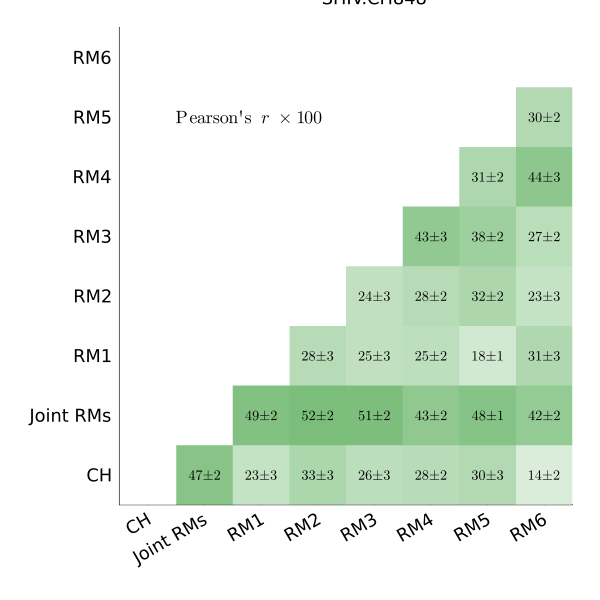

In [64]:

#Plots.savefig("../fig/Fitness_similarity_all_to_all_CH848_without_shuffle.png")
Plots.plot(p_out, size=(600, 600) )

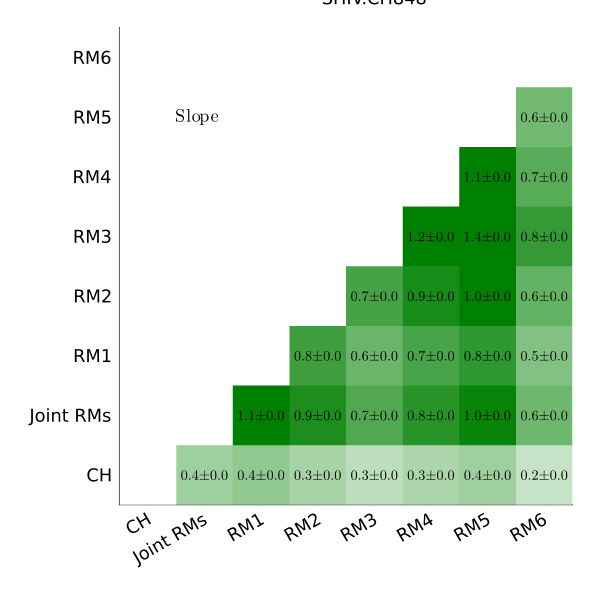

In [65]:
Plots.plot(p_out_v2, size=(600, 600) )

In [62]:
cor_mean_set = []; cor_std_set = []
model1_set = []; model2_set = []
model_name_list = [["CH848", "jointed_RMs"]; [@sprintf("RM%d", i) for i in 1:6]]
for i in 1:size(cor_mat_smry,1)
    for j in (i+1):size(cor_mat_smry,2)
        push!(cor_mean_set, cor_mat_smry[i,j])
        push!(cor_std_set, cor_mat_smry_std[i,j])
        push!(model1_set, model_name_list[i])
        push!(model2_set, model_name_list[j])
    end
end;

# ------- Export the data for Fig.S5A, Pearson's r matrix   -------#
df = DataFrame(
    model1=model1_set, 
    model2=model2_set, 
    r_mean=cor_mean_set, 
    r_std=cor_std_set
)
#CSV.write("../out/for_figures/figS5B_pearson_mat.csv", df); 

Row,model1,model2,r_mean,r_std
,Any,Any,Any,Any
1,CH848,jointed_RMs,0.47618,0.0229206
2,CH848,RM1,0.206036,0.0298381
3,CH848,RM2,0.309008,0.0341934
4,CH848,RM3,0.288565,0.0218821
5,CH848,RM4,0.282847,0.0287085
6,CH848,RM5,0.301278,0.0315555
7,CH848,RM6,0.135701,0.0237069
8,jointed_RMs,RM1,0.486679,0.0228965
9,jointed_RMs,RM2,0.516722,0.0227722


## Comapre time when detected and selection coefficinet

In [159]:
# -------- Make Selection vs time plot for SHIV dsata ---------#
dir_name= "../data/mpl/SHIV.CH848_AA/"
L_fig_tot = 1200

(p1, p_violin, s_BNB_set, date_BNB_set, s_notBNB_set, 
    date_notBNB_set, date_bnAbs_RMs, s_bnAbs_RMs) = get_selection_vs_time_SHIV848(dir_name, L_fig_tot);


In [160]:
df = DataFrame(
    model = [repeat(["BNB"], length([date_BNB_set; date_bnAbs_RMs])); 
            repeat(["nonBNB"], length(date_notBNB_set))],
    date = [date_BNB_set; date_bnAbs_RMs; date_notBNB_set],
    selection = [s_BNB_set; s_bnAbs_RMs; s_notBNB_set],
    bnAbs = [[false for _ in 1:length(s_BNB_set)]; 
     [true for _ in 1:length(s_bnAbs_RMs)];
     [false for _ in 1:length(s_notBNB_set)]])
CSV.write("../out/for_figures/fig5CD_selection_vs_time_SHIV.csv", df); 

In [24]:
linreg(randn(10), randn(10))

0.16227156736663567

### The following cells obtain trajectories and mutations that involved in glycan and/or resistant to bnAbs. 

In [12]:
function get_glycosylation_simple_AA(i_seq, mut_AA, TF_seq, len_seq)
    notX = ["P", "*", "?", "-"]; SorT = ["S", "T"]
    n_glycan_plus, n_glycan_minus = 0, 0
    TF_AA = String(TF_seq[i_seq])
    if( (mut_AA == "N") && (TF_AA != "N") && (i_seq<len_seq-1) )
        TF_1_AA = String(TF_seq[i_seq+1]); TF_2_AA = String(TF_seq[i_seq+2])
        if( (TF_1_AA ∉ notX) && (TF_2_AA in SorT) )
            n_glycan_plus +=1
        end
    end
    if( (mut_AA ∉ notX) && (TF_AA ∈ notX) && (1<i_seq<len_seq) )
        TF_1_AA = String(TF_seq[i_seq-1]); TF_2_AA = String(TF_seq[i_seq+1])
        if( (TF_1_AA == "N") && (TF_2_AA in SorT) )
            n_glycan_plus +=1
        end    
    end
    if( (mut_AA ∈ SorT) && (TF_AA ∉ SorT) && (2<i_seq) )
        TF_1_AA = String(TF_seq[i_seq-2]); TF_2_AA = String(TF_seq[i_seq-1])
        if( (TF_1_AA == "N") && (TF_2_AA ∉ notX) )
            n_glycan_plus +=1
        end    
    end
    
    if( (TF_AA == "N") && (mut_AA != "N") && (i_seq<len_seq-1) )
        TF_1_AA = String(TF_seq[i_seq+1]); TF_2_AA = String(TF_seq[i_seq+2])
        if( (TF_1_AA ∉ notX) && (TF_2_AA in SorT) )
            n_glycan_minus +=1
        end
    end
    if( (TF_AA ∉ notX) && (mut_AA ∈ notX) && (1<i_seq<len_seq) )
        TF_1_AA = String(TF_seq[i_seq-1]); TF_2_AA = String(TF_seq[i_seq+1])
        if( (TF_1_AA == "N") && (TF_2_AA in SorT) )
            n_glycan_minus +=1
        end    
    end
    if( (TF_AA ∈ SorT) && (mut_AA ∉ SorT) && (2<i_seq) )
        TF_1_AA = String(TF_seq[i_seq-2]); TF_2_AA = String(TF_seq[i_seq-1])
        if( (TF_1_AA == "N") && (TF_2_AA ∉ notX) )
            n_glycan_minus +=1
        end    
    end 
    return (n_glycan_plus, n_glycan_minus)
end;
            
function get_date_of_freq(csv_raw_in)
    extracted_integers = []
    index_to_find_integers = []
    pattern = r"f_at_(\d+)"
    n_id = 0
    for var in names(csv_raw_in)
        var_match = match(pattern, var)
        n_id += 1
        if var_match !== nothing
            push!(extracted_integers, String(var_match.captures[1]))
            push!(index_to_find_integers, n_id)
        end
    end;
    return (extracted_integers, index_to_find_integers)
end;
    
        

In [30]:
# At the directory for the /data/mpl/SHIV.CH505_AA/ there are fies named RM<id>-poly.csv with names of mutaions. 
# Given TF's amino acid sequences, we should be able to identify the mutations that alter the glycan and its trajectories. 

TF_seq_aa_raw = DataFrame(CSV.File("../data/mpl/SHIV.CH848_AA/index-703010848.csv"));
TF_aa = String.(TF_seq_aa_raw.TF)
TF_seq = TF_aa
TF_HXB2 = String.(TF_seq_aa_raw.HXB2);
len_seq = length(TF_HXB2);

In [31]:
individual_set = []
id_set_csv = []; types_set_csv = []
date_set_csv = []; mutation_name_set_csv = [];  freq_set_csv = []
#
date_mutation_was_detected_s_vs_t = []
id_set_s_vs_t = []; types_set_s_vs_t = []; individual_set_s_vs_t = []; selection_RMs_set_s_vs_t = []
mutations_set_s_vs_t = []; selection_set_s_vs_t = []
mutation_resistant_bnAbs = ["N301D", "D325N", "V295N", "D325N"];
VL_enhancing = ["N130D", "N279D", "K302N", "Y330H", "N334S", "H417R"]
fname_Human_RM = ["703010848", "RM6163", "RM6167", "RM6700", "RM6713", "RM6714", "RM6720"];

csv_raw_RMs = DataFrame(CSV.File("../data/mpl/SHIV.CH848_AA/RMs-poly.csv"));
for i_HRM in 2:length(fname_Human_RM)
    csv_raw_in = DataFrame(CSV.File(@sprintf("../data/mpl/SHIV.CH848_AA/%s-poly.csv", fname_Human_RM[i_HRM])));
    (extracted_integers, index_to_find_integers) = get_date_of_freq(csv_raw_in)
    n_mutation_selected = 0
    for n in 1:length(csv_raw_in.mutation)
        x = csv_raw_in.mutation[n]
        x_splited = split(x, "")
        date_detected = 1
        if(fname_Human_RM[i_HRM] != "RMs")
            date_detected = csv_raw_in.date[n]
        end
        
        mut_wt = x_splited[1]; mut_mt = x_splited[end]
        i_hxb2 = join(x_splited[2:(end-1)])
        #@printf("%s, %s, %s\n", i_hxb2, mut_wt, mut_mt)
        if( i_hxb2 ∈ TF_HXB2 && (date_detected > 0))
            i_seq = collect(1:len_seq)[TF_HXB2 .== i_hxb2][1]        
            n_mutation_selected += 1
            TF_AA = String(TF_seq[i_seq])
            mut_AA = String(mut_mt)
            (n_glycan_plus, n_glycan_minus) = get_glycosylation_simple_AA(i_seq, mut_AA, TF_seq, len_seq)
            #@printf("%d %d\n", n_glycan_plus, n_glycan_minus)
            
            if(n_glycan_plus>0 || n_glycan_minus>0)
                mutation_id = join([fname_Human_RM[i_HRM], n_mutation_selected], ".")
                types_of_mutation = "glycan" 
                push!(individual_set_s_vs_t, fname_Human_RM[i_HRM])
                push!(date_mutation_was_detected_s_vs_t, date_detected)
                push!(id_set_s_vs_t, mutation_id)
                push!(types_set_s_vs_t, types_of_mutation)
                push!(mutations_set_s_vs_t, csv_raw_in.mutation[n])
                push!(selection_set_s_vs_t, csv_raw_in.s_MPL[n])
                id_find_mutations = csv_raw_RMs.mutation .== csv_raw_in.mutation[n]
                if(count(id_find_mutations)>0)
                    push!(selection_RMs_set_s_vs_t, csv_raw_RMs.s_MPL[id_find_mutations][1])
                else
                    push!(selection_RMs_set_s_vs_t, 0.0)
                end
                #
                for (date_this, index_this) in zip(extracted_integers, index_to_find_integers)
                    push!(individual_set, fname_Human_RM[i_HRM])
                    date_this_mutation = date_this # this information is used for making trajectory plots.
                    freq_this = csv_raw_in[n, index_this]
                    push!(id_set_csv, mutation_id)
                    push!(types_set_csv, types_of_mutation)
                    push!(date_set_csv, date_this_mutation)
                    push!(mutation_name_set_csv, csv_raw_in.mutation[n])
                    push!(freq_set_csv, freq_this)
                end
            end
        end
        #
        if(x ∈ mutation_resistant_bnAbs && (date_detected > 0))
            n_mutation_selected += 1
            mutation_id = join([fname_Human_RM[i_HRM], n_mutation_selected], ".")
            types_of_mutation = "bnAbs_resistance" 
            push!(individual_set_s_vs_t, fname_Human_RM[i_HRM])
            push!(date_mutation_was_detected_s_vs_t, date_detected)
            push!(id_set_s_vs_t, mutation_id)
            push!(types_set_s_vs_t, types_of_mutation)
            push!(mutations_set_s_vs_t, csv_raw_in.mutation[n])
            push!(selection_set_s_vs_t, csv_raw_in.s_MPL[n])
            id_find_mutations = csv_raw_RMs.mutation .== csv_raw_in.mutation[n]
            if(count(id_find_mutations)>0)
                push!(selection_RMs_set_s_vs_t, csv_raw_RMs.s_MPL[id_find_mutations][1])
            else
                push!(selection_RMs_set_s_vs_t, 0.0)
            end
            for (date_this, index_this) in zip(extracted_integers, index_to_find_integers)
                push!(individual_set, fname_Human_RM[i_HRM])
                date_this_mutation = date_this # this information is used for making trajectory plots.
                freq_this = csv_raw_in[n, index_this]
                push!(id_set_csv, mutation_id)
                push!(types_set_csv, types_of_mutation)
                push!(date_set_csv, date_this_mutation)
                push!(mutation_name_set_csv, csv_raw_in.mutation[n])
                push!(freq_set_csv, freq_this)
            end
        end
        if(x ∈ VL_enhancing && (date_detected > 0))
            n_mutation_selected += 1
            mutation_id = join([fname_Human_RM[i_HRM], n_mutation_selected], ".")
            types_of_mutation = "increase_VL" 
            push!(individual_set_s_vs_t, fname_Human_RM[i_HRM])
            push!(date_mutation_was_detected_s_vs_t, date_detected)
            push!(id_set_s_vs_t, mutation_id)
            push!(types_set_s_vs_t, types_of_mutation)
            push!(mutations_set_s_vs_t, csv_raw_in.mutation[n])
            push!(selection_set_s_vs_t, csv_raw_in.s_MPL[n])
            id_find_mutations = csv_raw_RMs.mutation .== csv_raw_in.mutation[n]
            if(count(id_find_mutations)>0)
                push!(selection_RMs_set_s_vs_t, csv_raw_RMs.s_MPL[id_find_mutations][1])
            else
                push!(selection_RMs_set_s_vs_t, 0.0)
            end
            push!(selection_RMs_set_s_vs_t, )
            for (date_this, index_this) in zip(extracted_integers, index_to_find_integers)
                push!(individual_set, fname_Human_RM[i_HRM])
                date_this_mutation = date_this # this information is used for making trajectory plots.
                freq_this = csv_raw_in[n, index_this]
                push!(id_set_csv, mutation_id)
                push!(types_set_csv, types_of_mutation)
                push!(date_set_csv, date_this_mutation)
                push!(mutation_name_set_csv, csv_raw_in.mutation[n])
                push!(freq_set_csv, freq_this)
            end
        end
    end
end


In [32]:
df = DataFrame(
    individual = individual_set, 
    id = id_set_csv,
    types = types_set_csv,
    date = date_set_csv,
    mutation = mutation_name_set_csv,
    frequency = freq_set_csv
);
CSV.write("../out/for_figures/trajectories_RMs_SHIVCH848.csv", df);
#
df = DataFrame(
    individual = individual_set_s_vs_t, 
    id = id_set_s_vs_t,
    types = types_set_s_vs_t,
    date = date_mutation_was_detected_s_vs_t,
    mutation = mutations_set_s_vs_t,
    selection = selection_set_s_vs_t, 
    selection_RMs = selection_RMs_set_s_vs_t
);
CSV.write("../out/for_figures/selection_RMs_SHIVCH848.csv", df);